<a href="https://colab.research.google.com/github/jefferson2601/Avalia-o-de-produtos/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


# Carregar os dados
base = pd.read_csv('insurance.csv')

# Remover a coluna desnecessária, se existir
if 'Unnamed: 0' in base.columns:
    base = base.drop(columns=['Unnamed: 0'])

# Tratar valores ausentes preenchendo com a média das colunas numéricas
base.fillna(base.mean(numeric_only=True), inplace=True)

# Aplicar Label Encoding nas colunas categóricas
labelencoder = LabelEncoder()
for col in base.columns:
    if base[col].dtype == 'object':  # Se for uma string
        base[col] = labelencoder.fit_transform(base[col])

# Separar variáveis independentes (X) e dependentes (y)
y = base.iloc[:, 7].values  # Coluna alvo
x = base.drop(columns=[base.columns[7]]).values.astype(float)  # Converter X para float

# Garantir que não há valores NaN após o processamento
if np.isnan(x).sum() > 0 or np.isnan(y).sum() > 0:
    raise ValueError("Ainda existem valores NaN após o processamento.")

# Dividir os dados em treino e teste
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

# Treinar o modelo Naive Bayes
modelo = GaussianNB()
modelo.fit(x_treinamento, y_treinamento)

# Fazer previsões



GaussianNB()

In [25]:
previsoes = modelo.predict(x_teste)

In [26]:
previsoes

array([3, 3, 3, ..., 3, 0, 3])

Acurácia do modelo: 0.84


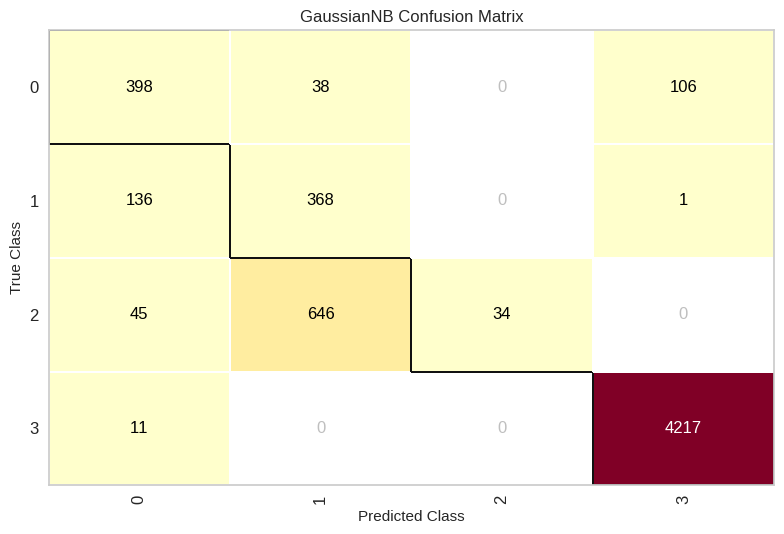

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [27]:
y_pred = modelo.predict(x_teste)

# Avaliar o modelo
acuracia = accuracy_score(y_teste, y_pred)
print(f'Acurácia do modelo: {acuracia:.2f}')

# Matriz de Confusão
cm = ConfusionMatrix(modelo)
cm.fit(x_treinamento, y_treinamento)
cm.score(x_teste, y_teste)
cm.show()

In [32]:
precision = precision_score(y_teste, previsoes, average='weighted')
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Precision: 0.8984416515911416
Recall: 0.8361666666666666
F1-Score: 0.8090758902175055


In [35]:
report = classification_report(y_teste, previsoes)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       542
           1       0.35      0.73      0.47       505
           2       1.00      0.05      0.09       725
           3       0.98      1.00      0.99      4228

    accuracy                           0.84      6000
   macro avg       0.75      0.63      0.56      6000
weighted avg       0.90      0.84      0.81      6000



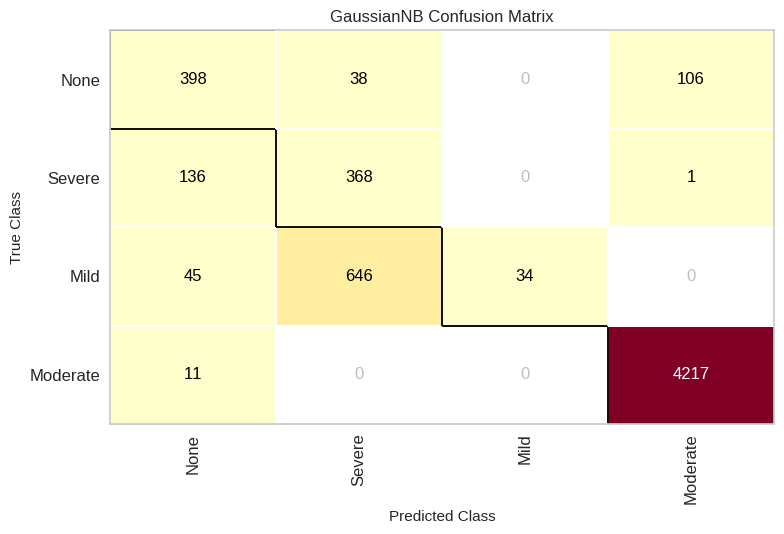

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [37]:
confusao = ConfusionMatrix(modelo, classes=['None', 'Severe', 'Mild', 'Moderate'])
confusao.fit(x_treinamento, y_treinamento)
confusao.score(x_teste, y_teste)
confusao.poof()